In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_data = pd.read_json('ultimate_data_challenge.json')

In [3]:
len(user_data)

50000

In [4]:
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
# Checking whether our service operates solely in Westeros
user_data.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [6]:
# For easy reference
user_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [7]:
user_data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [8]:
# Change the dates from strings to datetimes
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'])
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'])

In [9]:
user_data.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


In [10]:
# Check for missing values
user_data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [11]:
# Replace null values for phones with the word "None"
user_data['phone'] = user_data['phone'].fillna('None')

In [12]:
user_data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [13]:
# Automate pie chart creation
def pie_chart(feature=None,title=None,df=user_data):
    '''Create a pie chart of a categorical feature from dataframe'''
    if not feature:
        raise Exception("No feature chosen")
    values = df[feature].unique()
    counts = []
    for value in values:
        counts.append(len(df[df[feature] == value]))
    if sum(counts) != len(df):
        raise Exception('Some data is missing')
    plt.pie(counts, labels=values,autopct='%1.1f%%')
    if not title:
        title = "Users' " + feature
    plt.title(title)
    plt.show()

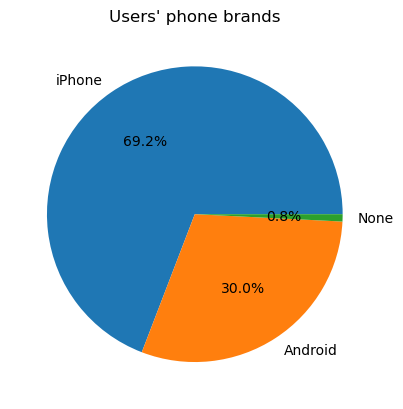

In [14]:
pie_chart('phone',"Users' phone brands")

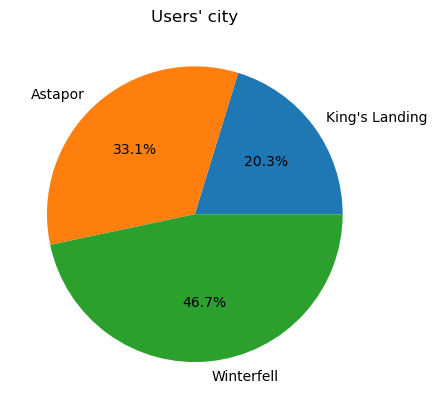

In [15]:
pie_chart('city')

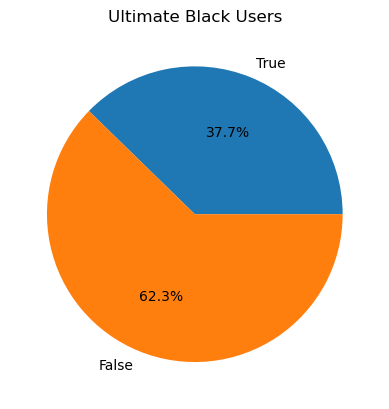

In [16]:
pie_chart('ultimate_black_user',"Ultimate Black Users")

In [17]:
# For ease of calculations, since a month isn't always 30 days but all of our users signed up in January
user_data['six_months'] = user_data['signup_date'].apply(lambda x: pd.to_datetime('{}-07-{}'.format(x.year,x.day)))

In [18]:
# Find our target feature: Whether a user has taken a ride within 30 days after 6 months
user_data['active'] = user_data['six_months'] - user_data['last_trip_date'] < pd.Timedelta('30 days')

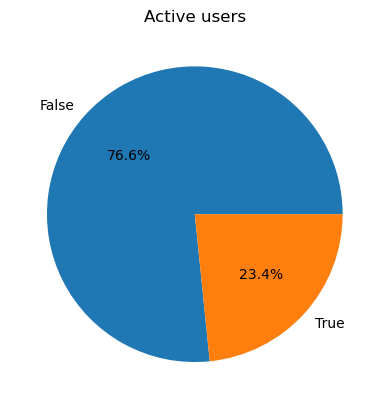

In [19]:
# Check proportion of active users
pie_chart('active','Active users')

In [20]:
user_data = user_data.fillna(0)

In [21]:
active_users = user_data[user_data['active']]
inactive_users = user_data[user_data['active'] == False]

In [22]:
active_users.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,six_months
count,11694.000000,11694,11694.000000,11694.000000,11694,11694.000000,11694.000000,11694.000000,11694.000000,11694
mean,3.672824,2014-01-12 11:56:18.347870720,4.268505,1.077237,2014-06-24 11:25:09.081580288,9.484676,61.232307,4.866582,4.752771,2014-07-12 11:56:18.347870720
min,0.000000,2014-01-01 00:00:00,0.000000,1.000000,2014-06-02 00:00:00,0.000000,0.000000,0.000000,0.000000,2014-07-01 00:00:00
25%,0.000000,2014-01-06 00:00:00,4.200000,1.000000,2014-06-21 00:00:00,0.000000,45.500000,2.540000,4.600000,2014-07-06 00:00:00
50%,2.000000,2014-01-11 00:00:00,4.700000,1.020000,2014-06-27 00:00:00,3.300000,63.600000,3.640000,4.800000,2014-07-11 00:00:00
75%,5.000000,2014-01-18 00:00:00,5.000000,1.100000,2014-06-29 00:00:00,14.300000,81.800000,5.510000,5.000000,2014-07-18 00:00:00
max,125.000000,2014-01-30 00:00:00,5.000000,4.500000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000,2014-07-30 00:00:00
std,5.445392,NaN,1.277904,0.163581,NaN,15.042752,28.019978,4.363650,0.357874,NaN


In [23]:
inactive_users.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,six_months
count,38306.000000,38306,38306.000000,38306.000000,38306,38306.000000,38306.000000,38306.000000,38306.000000,38306
mean,1.852451,2014-01-17 18:43:30.765937408,3.727567,1.074009,2014-03-30 03:26:25.067613440,8.655641,60.832601,6.080810,4.760836,2014-07-17 18:43:30.765937408
min,0.000000,2014-01-01 00:00:00,0.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,2014-07-01 00:00:00
25%,0.000000,2014-01-11 00:00:00,3.700000,1.000000,2014-01-30 00:00:00,0.000000,25.000000,2.370000,4.800000,2014-07-11 00:00:00
50%,1.000000,2014-01-18 00:00:00,4.700000,1.000000,2014-04-02 00:00:00,0.000000,66.700000,4.000000,5.000000,2014-07-18 00:00:00
75%,2.000000,2014-01-25 00:00:00,5.000000,1.000000,2014-05-23 00:00:00,0.000000,100.000000,7.520000,5.000000,2014-07-25 00:00:00
max,73.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,129.890000,5.000000,2014-07-31 00:00:00
std,2.991508,NaN,1.900027,0.237390,NaN,21.230399,39.434950,6.029998,0.582721,NaN


In [24]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [25]:
user_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'six_months', 'active'],
      dtype='object')

In [26]:
X_columns = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']
X = user_data[X_columns]
y = user_data['active']
X = pd.get_dummies(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
tree = DecisionTreeClassifier(random_state=42)

In [29]:
clf = RandomizedSearchCV(tree, {'criterion':['gini','entropy','log_loss'],'max_depth': [None, 6,7,8,9,10,11],'max_features': [None,1,2,3,4,5]},error_score="raise",scoring='f1',random_state=42,verbose=3)

In [30]:
search = clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.426 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.433 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.374 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.462 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.465 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=1;, score=0.314 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=1;, score=0.374 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=1;, score=0.418 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=1;, score=0.343 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=1;, score=0.452 total time=   0.0s
[CV 1/5] END criter

In [31]:
search.best_params_

{'max_features': 5, 'max_depth': 10, 'criterion': 'entropy'}

In [32]:
search.best_score_

0.4698466817450079

In [33]:
best_tree = DecisionTreeClassifier(max_features=5,max_depth=10,criterion='entropy',random_state=42)

In [34]:
best_tree = best_tree.fit(X_train,y_train)

In [35]:
tree_predictions = best_tree.predict(X_test)

In [36]:
y_test

33553     True
9427      True
199      False
12447    False
39489    False
         ...  
28567    False
25079    False
18707    False
15200     True
5857     False
Name: active, Length: 10000, dtype: bool

In [37]:
print(classification_report(tree_predictions,y_test))

              precision    recall  f1-score   support

       False       0.92      0.83      0.87      8483
        True       0.38      0.60      0.47      1517

    accuracy                           0.79     10000
   macro avg       0.65      0.71      0.67     10000
weighted avg       0.84      0.79      0.81     10000



In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
clf = RandomizedSearchCV(tree, {'criterion':['gini','entropy','log_loss'],'max_depth': [None, 6,7,8,9,10,11],'max_features': [None,1,2,3,4,5]},error_score="raise",scoring='f1',random_state=42,verbose=3)

In [40]:
search = clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.426 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.433 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.374 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.462 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=1;, score=0.465 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=1;, score=0.314 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=1;, score=0.374 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=1;, score=0.418 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=1;, score=0.343 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=1;, score=0.452 total time=   0.0s
[CV 1/5] END criter

In [41]:
search.best_params_

{'max_features': 5, 'max_depth': 10, 'criterion': 'entropy'}

In [42]:
grid_tree = DecisionTreeClassifier(criterion='gini',max_depth=8,max_features=None)

In [43]:
grid_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [44]:
grid_predictions= grid_tree.predict(X_test)

In [45]:
print(classification_report(grid_predictions,y_test))

              precision    recall  f1-score   support

       False       0.92      0.83      0.87      8434
        True       0.40      0.60      0.48      1566

    accuracy                           0.80     10000
   macro avg       0.66      0.72      0.68     10000
weighted avg       0.84      0.80      0.81     10000



In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
clf = RandomizedSearchCV(knn, {'n_neighbors': [1,3,5,7,9],'weights':['uniform', 'distance']},scoring='f1',random_state=42,verbose=3)

In [49]:
search = clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.425 total time=   0.4s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.411 total time=   0.4s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.414 total time=   0.4s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.431 total time=   0.4s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.417 total time=   0.4s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.425 total time=   0.2s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.411 total time=   0.2s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.414 total time=   0.2s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.431 total time=   0.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.417 total time=   0.1s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.416 total time=   0.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

In [50]:
search.best_params_

{'weights': 'distance', 'n_neighbors': 5}

In [51]:
search.best_score_

0.4289256022740351

In [52]:
best_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [53]:
best_knn.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [54]:
knn_predictions = best_knn.predict(X_test)

In [55]:
print(classification_report(knn_predictions,y_test))

              precision    recall  f1-score   support

       False       0.87      0.82      0.85      8110
        True       0.39      0.49      0.44      1890

    accuracy                           0.76     10000
   macro avg       0.63      0.66      0.64     10000
weighted avg       0.78      0.76      0.77     10000



In [56]:
interpretable_tree = DecisionTreeClassifier(max_features=2,max_depth=4,criterion='entropy',random_state=42)

In [57]:
interpretable_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=2,
                       random_state=42)

In [58]:
interp_predictions = interpretable_tree.predict(X_test)

In [59]:
print(classification_report(interp_predictions,y_test))

              precision    recall  f1-score   support

       False       0.90      0.82      0.85      8390
        True       0.35      0.51      0.41      1610

    accuracy                           0.77     10000
   macro avg       0.62      0.66      0.63     10000
weighted avg       0.81      0.77      0.78     10000



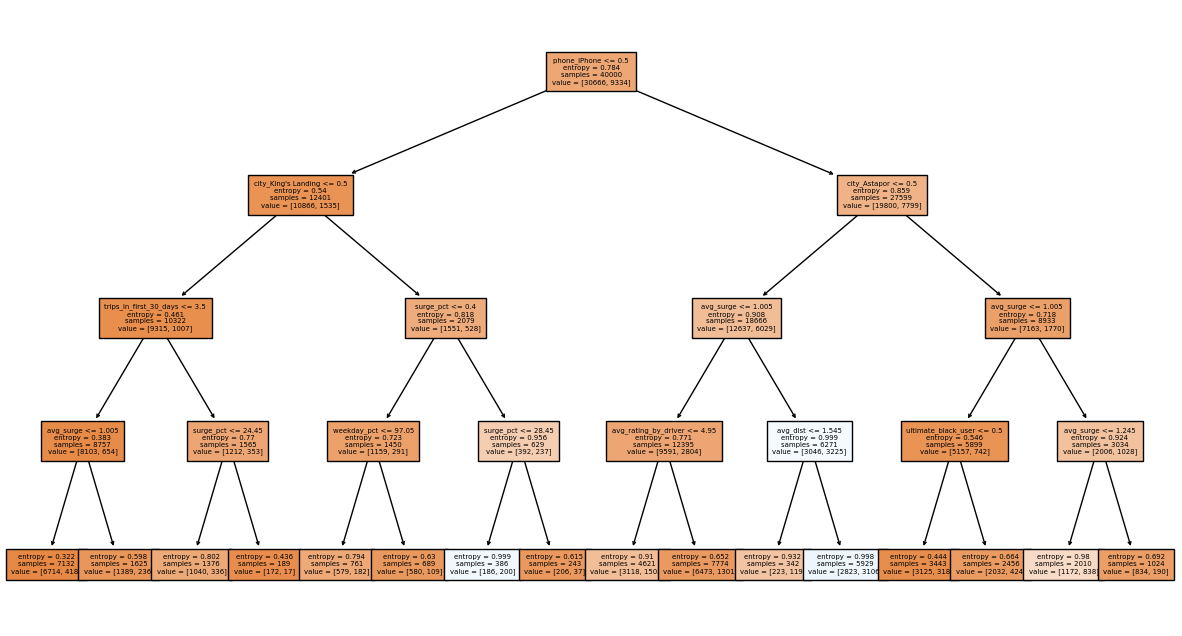

In [78]:
plt.figure(figsize=(15,8))
plot_tree(interpretable_tree,fontsize=5,filled=True,feature_names=X_test.columns)
plt.savefig('decisiontree.png')

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [67]:
scaler = StandardScaler()
pca = PCA(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
pipe = Pipeline(steps = [("scaler", scaler), ("pca", pca), ("tree", tree)])

In [69]:
param_grid = {'pca__n_components': [3, 6, 9, 12],'tree__criterion':['gini','entropy','log_loss'],'tree__max_depth': [None, 6,7,8,9,10,11],'tree__max_features': [None,1,2,3,4,5]}

In [70]:
search = RandomizedSearchCV(pipe, param_grid, random_state=42,scoring='f1',verbose=3)

In [71]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END pca__n_components=6, tree__criterion=entropy, tree__max_depth=None, tree__max_features=5;, score=0.374 total time=   0.6s
[CV 2/5] END pca__n_components=6, tree__criterion=entropy, tree__max_depth=None, tree__max_features=5;, score=0.399 total time=   0.4s
[CV 3/5] END pca__n_components=6, tree__criterion=entropy, tree__max_depth=None, tree__max_features=5;, score=0.405 total time=   0.4s
[CV 4/5] END pca__n_components=6, tree__criterion=entropy, tree__max_depth=None, tree__max_features=5;, score=0.403 total time=   0.3s
[CV 5/5] END pca__n_components=6, tree__criterion=entropy, tree__max_depth=None, tree__max_features=5;, score=0.411 total time=   0.3s
[CV 1/5] END pca__n_components=9, tree__criterion=gini, tree__max_depth=8, tree__max_features=4;, score=0.359 total time=   0.1s
[CV 2/5] END pca__n_components=9, tree__criterion=gini, tree__max_depth=8, tree__max_features=4;, score=0.376 total time=   0.1s
[CV 3/

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(random_state=42)),
                                             ('tree',
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': [3, 6, 9, 12],
                                        'tree__criterion': ['gini', 'entropy',
                                                            'log_loss'],
                                        'tree__max_depth': [None, 6, 7, 8, 9,
                                                            10, 11],
                                        'tree__max_features': [None, 1, 2, 3, 4,
                                                               5]},
                   random_state=42, scoring='f1', verbose=3)

In [72]:
search.best_score_

0.4313604734004729

In [73]:
knn = KNeighborsClassifier()
param_grid = {'pca__n_components':[3,6,9,12],'knn__n_neighbors': [1,3,5,7,9],'knn__weights':['uniform', 'distance']}
pipe = Pipeline(steps = [("scaler", scaler), ("pca", pca), ("knn", knn)])
search = RandomizedSearchCV(pipe, param_grid, random_state=42,scoring='f1',verbose=3)

In [74]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=12;, score=0.432 total time=   0.5s
[CV 2/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=12;, score=0.447 total time=   0.5s
[CV 3/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=12;, score=0.438 total time=   0.6s
[CV 4/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=12;, score=0.446 total time=   0.6s
[CV 5/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=12;, score=0.447 total time=   0.6s
[CV 1/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=3;, score=0.383 total time=   0.4s
[CV 2/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=3;, score=0.384 total time=   0.3s
[CV 3/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=3;, score=0.374 total time=   0.4s
[CV 4/5] END knn__n_neighbors=5, knn__weights=uniform, pca__n_componen

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(random_state=42)),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': [1, 3, 5, 7, 9],
                                        'knn__weights': ['uniform', 'distance'],
                                        'pca__n_components': [3, 6, 9, 12]},
                   random_state=42, scoring='f1', verbose=3)

In [75]:
search.best_score_

0.45012200512057793

In [76]:
def correct_percent(actual, predicted):
    total = actual.sum()
    return round((actual & predicted).sum()/total*100, 2)

In [77]:
print(f"The test set actually contained {y_test.sum()} active members, out of 10000.")
print(f"The best tree, according to grid search, predicted {tree_predictions.sum()} active members, \
of which {correct_percent(y_test, tree_predictions)}% were correct.")
print(f"A more interpretable tree predicted {interp_predictions.sum()} active members, \
of which {correct_percent(y_test, interp_predictions)}% were correct.")
print(f"K nearest neighbors with 5 neighbors predicted {knn_predictions.sum()} active members, \
of which {correct_percent(y_test, knn_predictions)}% were correct.")

The test set actually contained 2360 active members, out of 10000.
The best tree, according to grid search, predicted 1517 active members, of which 38.47% were correct.
A more interpretable tree predicted 1610 active members, of which 34.83% were correct.
K nearest neighbors with 5 neighbors predicted 1890 active members, of which 39.36% were correct.
